Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# printing the first 5 rows of the dataset
data = pd.read_csv('/content/autism_screening.csv')
display(data.head(n=5))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [5]:
# Total number of records
n_records = len(data.index)

In [6]:
# TODO: Number of records where individual's with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

In [7]:
# TODO: Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

In [8]:
# TODO: Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

In [9]:
# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))
print("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))

Total number of records: 704
Individuals diagonised with ASD: 189
Individuals not diagonised with ASD: 515
Percentage of individuals diagonised with ASD: 26.85%


** Featureset Exploration **

This data contains 704 instances, and contains the following attributes:

-age: number (Age in years)

-gender: String [Male/Female]

-ethnicity: String (List of common ethnicities in text format)

-Born with jaundice: Boolean [yes or no]

-Family member with PDD: Boolean [yes or no]

-Who is completing the test: String [Parent, self, caregiver, medical staff, clinician ,etc.]

-Country of residence : String (List of countries in text format)

-Used the screening app before : Boolean [yes or no] (Whether the user has used a screening app)

-Screening Method Type: Integer [0,1,2,3] (The type of screening methods chosen based on age category (0=toddler, 1=child, 2= adolescent, 3= adult)

-Question 1-10 Answer: Binary [0, 1] (The answer code of the question based on the screening method used)

-Screening Score: Integer (The final score obtained based on the scoring algorithm of the screening method used. This was computed in an automated manner)

In [10]:
asd_data = pd.read_csv('/content/autism_screening.csv', na_values=['?'])
asd_data.head(n=5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO


In [11]:
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [12]:
# finding the missing values
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull())
|(asd_data['jundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO
12,0,1,1,1,1,1,0,0,1,0,...,f,NaN,no,no,Bahamas,no,6.0,18 and more,NaN,NO
13,1,0,0,0,0,0,1,1,0,1,...,m,NaN,no,no,Austria,no,4.0,18 and more,NaN,NO
14,1,0,0,0,0,0,1,1,0,1,...,f,NaN,no,no,Argentina,no,4.0,18 and more,NaN,NO
19,0,0,0,0,0,0,1,1,0,1,...,m,NaN,yes,no,United Arab Emirates,no,3.0,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,0,0,0,0,0,0,0,0,1,...,f,NaN,no,no,United States,no,1.0,18 and more,NaN,NO
658,0,0,1,1,0,0,1,0,0,0,...,m,NaN,no,no,Azerbaijan,no,3.0,18 and more,NaN,NO
659,1,1,1,1,1,1,0,0,1,1,...,m,NaN,no,no,Pakistan,no,8.0,18 and more,NaN,YES
666,0,0,0,0,0,0,0,1,0,0,...,m,NaN,no,no,Iraq,no,1.0,18 and more,NaN,NO


In [13]:
# cleaning data
asd_data.dropna(inplace=True)
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,30.215107,5.077176
std,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,17.287470,2.522717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [14]:
# Reminder of the features:
print(asd_data.dtypes)


# Total number of records in clean dataset
n_records = len(asd_data.index)

# TODO: Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(asd_data[asd_data['Class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(asd_data[asd_data['Class/ASD'] == 'NO'])

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD           object
dtype: object
Total number of records: 609
Individuals diagonised with ASD: 180
Individuals not diagonised with ASD: 429


Quick visualization with seaborn

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

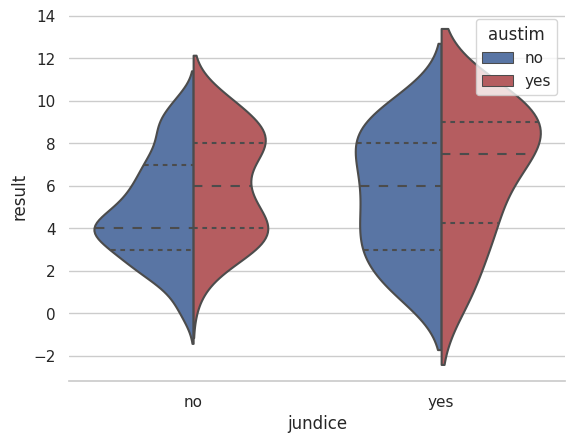

In [16]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="austim", data=asd_data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

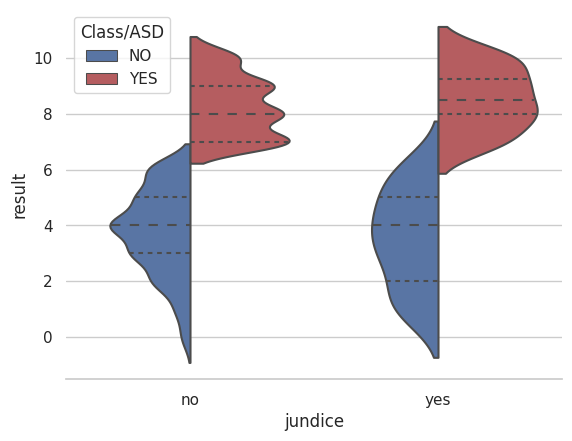

In [17]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

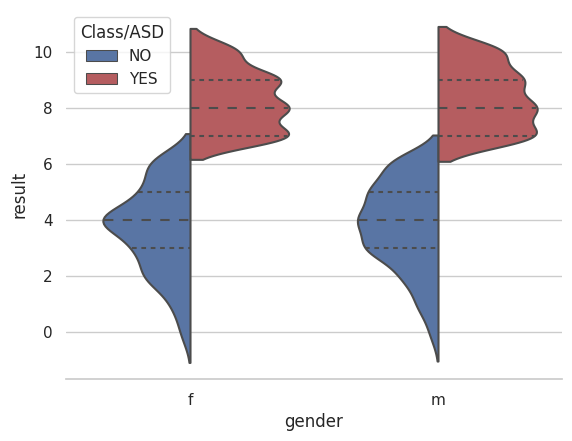

In [18]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 27.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.8% of the points cannot be placed

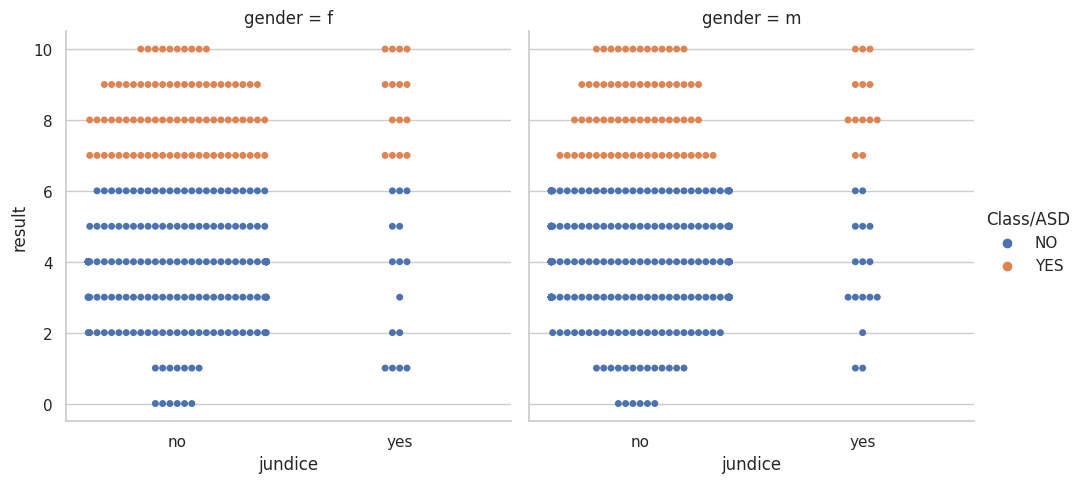

In [19]:
sns.catplot(x="jundice", y="result", hue="Class/ASD", col="gender", data=asd_data, kind="swarm");

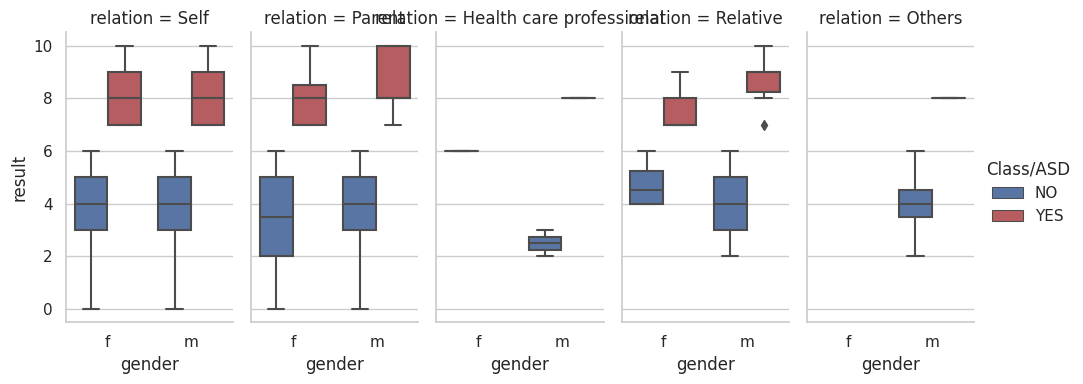

In [20]:
sns.catplot(x="gender", y="result", hue="Class/ASD", col="relation",
            data=asd_data, kind="box", height=4, aspect=.5, palette={'YES': "r", 'NO': "b"})

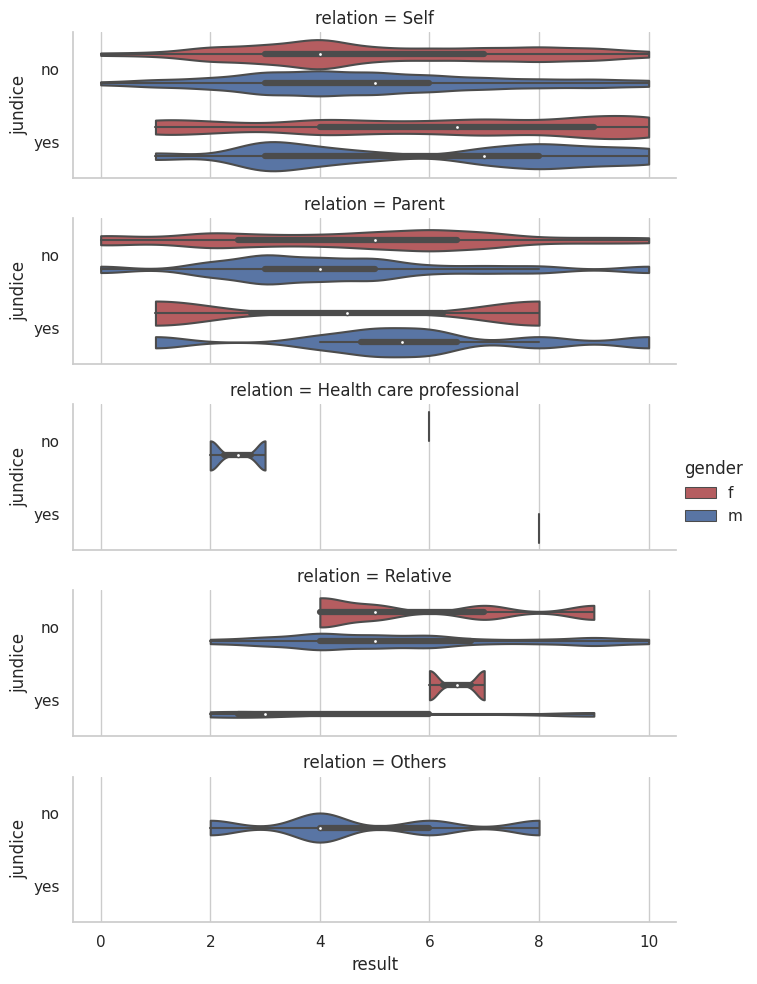

In [21]:
g = sns.catplot(x="result", y="jundice", hue="gender", row="relation",
                data=asd_data, kind="violin", height=2, aspect=3.5,
                palette={'f': "r", 'm': "b"}, dodge=True, cut=0, bw=.2)

In [22]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.024590,f,White-European,no,no,United States,0.6,Self,1,1,1,1,0,0,1,1,0,0
1,0.019126,m,Latino,no,yes,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
2,0.027322,m,Latino,yes,yes,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
3,0.049180,f,White-European,no,yes,United States,0.6,Self,1,1,0,1,0,0,1,1,0,1
5,0.051913,m,Others,yes,no,United States,0.9,Self,1,1,1,1,1,0,1,1,1,1


In [26]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.024590,0.6,1,1,1,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
1,0.019126,0.5,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.027322,0.8,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0.049180,0.6,1,1,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
5,0.051913,0.9,1,1,1,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1


94 total features after one-hot encoding.
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgium', 'contry_of_res_Bolivia', 'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada', 'contry_of_res_Chile', 'contry_of_res_China', 'contry_of_res_Costa Rica', 'contry_of_res_Cyprus', 'contry_of_res_Czech Republic', 'con

Text(0, 0.5, 'Frequency')

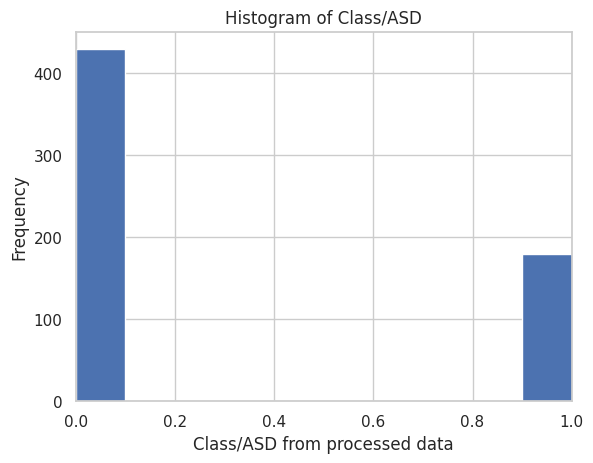

In [27]:
# histogram of Class/ASD

# 8 bins
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 487 samples.
Testing set has 122 samples.


In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

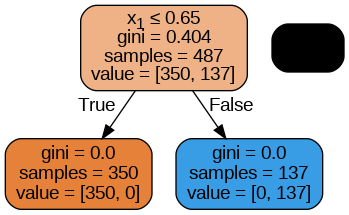

In [31]:
import pydotplus


dot_data = tree.export_graphviz(dectree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

from IPython.display import Image
Image(graph.create_png())

Evaluation

In [32]:
# make class predictions for the testing set
y_pred_class = dectree.predict(X_test)

In [33]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0]
False: [1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0]


In [34]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
#print(metrics.confusion_matrix(y_test, y_pred_class))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[79  0]
 [ 0 43]]


Metrics computed from a confusion matrix

In [35]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))

1.0


In [36]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.0


In [37]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

1.0
1.0


In [38]:
specificity = TN / (TN + FP)

print(specificity)

1.0


In [39]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
#print(1 - specificity)

0.0


In [40]:
precision = TP / float(TP + FP)

#print(precision)
print(metrics.precision_score(y_test, y_pred_class))

1.0


Visualizing the classification prediction:

In [41]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
dectree.predict(X_test)[0:10]

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [42]:
# print the first 10 predicted probabilities of class membership
dectree.predict_proba(X_test)[0:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [43]:
# store the predicted probabilities for class 1
y_pred_prob = dectree.predict_proba(X_test)[:, 1]

In [44]:
# allow plots to appear in the notebook

import matplotlib.pyplot as plt

# adjust the font size
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

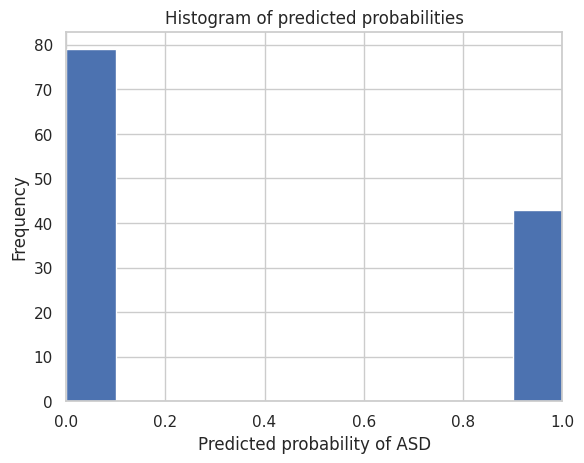

In [45]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of ASD')
plt.ylabel('Frequency')

Receiver Operating Characteristic (ROC) Curves

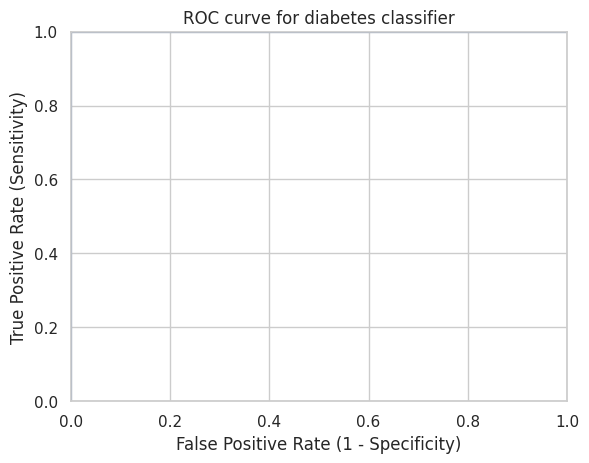

In [46]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Score metric for Model performance

In [47]:
dectree.score(X_test, y_test)

1.0

Cross-validation:

In [48]:
from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(dectree, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

**AUC Score:**

AUC is the percentage of the ROC plot that is underneath the curve

In [50]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(dectree, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

F-beta Score:

In [51]:
dectree.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = dectree.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0


(2) Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9933333333333334

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [54]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(ranfor, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9988095238095237

F-beta Score:

In [55]:
ranfor.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0


(3) SVM

In [56]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)

In [57]:
cv_scores = cross_val_score(svc, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [59]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(svc, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

F-beta Score:

In [60]:
svc.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0


(4) K-Nearest-Neighbors (KNN)

In [61]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)

cv_scores.mean()

0.9474590163934427

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [63]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(knn, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9930740125507567

F-beta Score:

In [64]:
knn.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9360730593607306

In [65]:
for n in range(10, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)
    print (n, cv_scores.mean())

10 0.9474590163934427
11 0.9507377049180328
12 0.9507377049180328
13 0.9540437158469945
14 0.9507650273224044
15 0.944207650273224
16 0.9507650273224044
17 0.9507377049180328
18 0.9523770491803278
19 0.9540163934426229
20 0.9523770491803278
21 0.9523770491803278
22 0.9474590163934424
23 0.9490983606557375
24 0.9507377049180326
25 0.9507377049180328
26 0.9523770491803278
27 0.9523770491803278
28 0.9507377049180326
29 0.9507377049180328
30 0.9523770491803278
31 0.9474863387978143
32 0.9491256830601094
33 0.9474863387978143
34 0.9507650273224044
35 0.9491256830601094
36 0.9524043715846995
37 0.9524043715846995
38 0.9540710382513661
39 0.9524316939890708
40 0.9540710382513659
41 0.9524316939890708
42 0.9507923497267757
43 0.9507923497267757
44 0.9507923497267757
45 0.9507923497267757
46 0.9524316939890708
47 0.9524316939890708
48 0.9557103825136611
49 0.9524316939890708



(5) Naive Bayes

In [66]:
from sklearn.naive_bayes import MultinomialNB

#scaler = preprocessing.MinMaxScaler()
#all_features_minmax = scaler.fit_transform(all_features)

nb = MultinomialNB()
cv_scores = cross_val_score(nb, features_final, asd_classes, cv=10)

cv_scores.mean()

0.885

In [68]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(nb, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9445090439276485

F-beta Score:

In [69]:
nb.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.8370044052863436


(6) Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9934426229508198

In [72]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(logreg, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

1.0

F-beta Score:

In [73]:
logreg.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9641255605381165


(7) Linear Discriminant Analysis

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9326229508196722

In [76]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(lda, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

0.9850590623846438

F-beta Score:

In [77]:
lda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = lda.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9148936170212767

(8) Quadratic Discriminant Analysis

In [78]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
cv_scores = cross_val_score(qda, features_final, asd_classes, cv=10)
cv_scores.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

0.35964480874316934

In [80]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(qda, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

0.8058477913129076

F-beta Score:

In [81]:
qda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = qda.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.42084168336673344

Model Tuning

In [85]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)


# TODO: Initialize the classifier
clf = SVC(random_state = 1)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f_beta_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)
# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9590
F-score on testing data: 0.9361

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000


Feature Importance

[ 1.86838514e-15  1.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.74128375e-16  0.00000000e+00  1.06737418e-18
  0.00000000e+00 -1.53701882e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

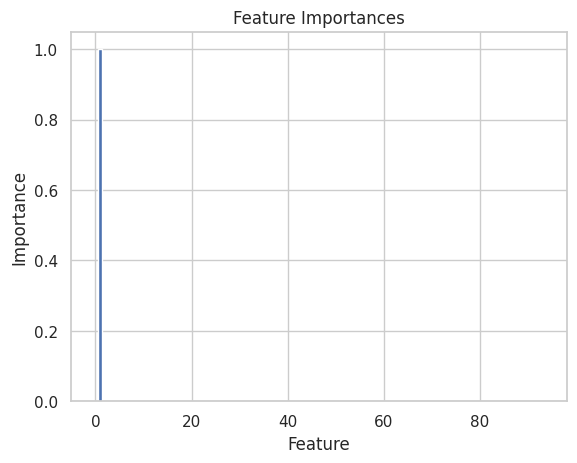

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_
importances = model.feature_importances_
print(importances)

# Plot the feature importances
features = range(len(importances))
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()



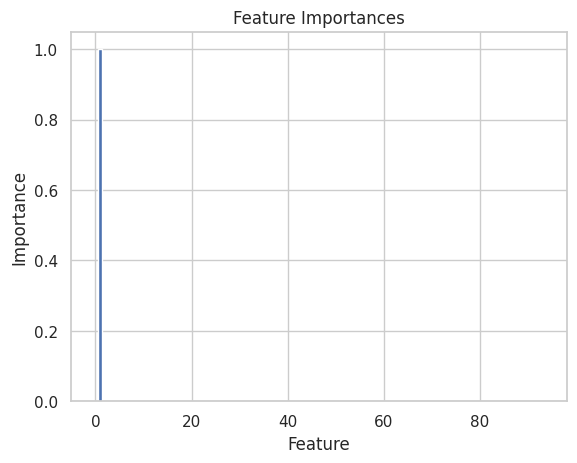

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the feature importances
features = range(len(importances))
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()



Building a MLP model architecture

In [94]:
# Imports
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


np.random.seed(42)

In [95]:
# Building the model architecture with one layer of length 4


model = Sequential()
model.add(Dense(8, activation='relu', input_dim= 94))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 760       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [97]:
# Running and evaluating the model
hist = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_data=(X_test, y_test),
          verbose=2)

Epoch 1/100
31/31 - 1s - loss: 0.6740 - accuracy: 0.7207 - val_loss: 0.6644 - val_accuracy: 0.6475 - 941ms/epoch - 30ms/step
Epoch 2/100
31/31 - 0s - loss: 0.6419 - accuracy: 0.7187 - val_loss: 0.6412 - val_accuracy: 0.6475 - 85ms/epoch - 3ms/step
Epoch 3/100
31/31 - 0s - loss: 0.6122 - accuracy: 0.7187 - val_loss: 0.6153 - val_accuracy: 0.6475 - 90ms/epoch - 3ms/step
Epoch 4/100
31/31 - 0s - loss: 0.5793 - accuracy: 0.7207 - val_loss: 0.5860 - val_accuracy: 0.6475 - 92ms/epoch - 3ms/step
Epoch 5/100
31/31 - 0s - loss: 0.5429 - accuracy: 0.7290 - val_loss: 0.5543 - val_accuracy: 0.6639 - 98ms/epoch - 3ms/step
Epoch 6/100
31/31 - 0s - loss: 0.5120 - accuracy: 0.7556 - val_loss: 0.5198 - val_accuracy: 0.6803 - 91ms/epoch - 3ms/step
Epoch 7/100
31/31 - 0s - loss: 0.4764 - accuracy: 0.7762 - val_loss: 0.4820 - val_accuracy: 0.7295 - 91ms/epoch - 3ms/step
Epoch 8/100
31/31 - 0s - loss: 0.4353 - accuracy: 0.8378 - val_loss: 0.4466 - val_accuracy: 0.7623 - 90ms/epoch - 3ms/step
Epoch 9/100
31

Evaluating the model

In [98]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("\n Testing accuracy: ", score[1])

16/16 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 1.0000

 Training Accuracy: 1.0

 Testing accuracy:  0.9754098653793335


Free-Flow Visualization:

In [100]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'asd_raw' is a DataFrame containing the 'result' column
asd_data['Class/ASD'] = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)

# Create a DataFrame from asd_data (if it's not already a DataFrame)
# asd_data = pd.DataFrame(data=asd_data)

# Extract the 'result' column and reshape it to a 2D array
result_column = asd_data['result'].values.reshape(-1, 1)

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'result' column
asd_data['result'] = scaler.fit_transform(result_column)


In [101]:
#ax = sns.regplot(x= 'result', y='Class/ASD', data = asd_data, fit_reg=False)

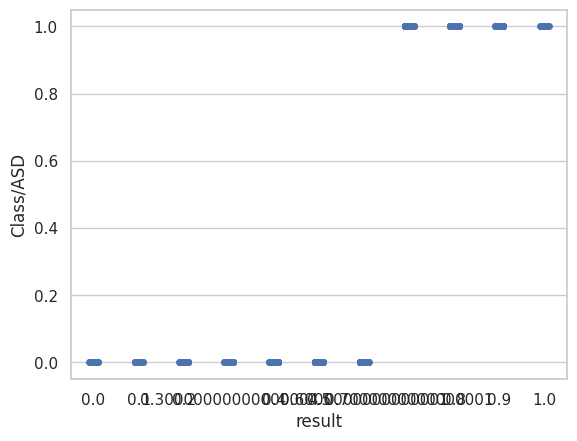

In [102]:
sns.stripplot(x="result", y="Class/ASD", data = asd_data, jitter=True);

In [103]:
#sns.swarmplot(x="result", y="Class/ASD", data=asd_data, palette={'YES': "r", 'NO': "b"});

Conclusion

Rebuilding the model without the 'result' variable.

In [104]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.024590,f,White-European,no,no,United States,Self,1,1,1,1,0,0,1,1,0,0
1,0.019126,m,Latino,no,yes,Brazil,Self,1,1,0,1,0,0,0,1,0,1
2,0.027322,m,Latino,yes,yes,Spain,Parent,1,1,0,1,1,0,1,1,1,1
3,0.049180,f,White-European,no,yes,United States,Self,1,1,0,1,0,0,1,1,0,1
5,0.051913,m,Others,yes,no,United States,Self,1,1,1,1,1,0,1,1,1,1


In [105]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.024590,1,1,1,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0.019126,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.027322,1,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0.049180,1,1,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
5,0.051913,1,1,1,1,1,0,1,1,1,...,0,0,1,0,0,0,0,0,0,1


93 total features after one-hot encoding.
['age', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgium', 'contry_of_res_Bolivia', 'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada', 'contry_of_res_Chile', 'contry_of_res_China', 'contry_of_res_Costa Rica', 'contry_of_res_Cyprus', 'contry_of_res_Czech Republic', 'contry_of_res

In [107]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 487 samples.
Testing set has 122 samples.


In [108]:
### (1) Decision Trees

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

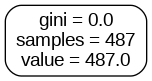

In [109]:
import pydotplus


dot_data = tree.export_graphviz(dectree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

from IPython.display import Image
Image(graph.create_png())

In [110]:
from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(dectree, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

In [111]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

In [112]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

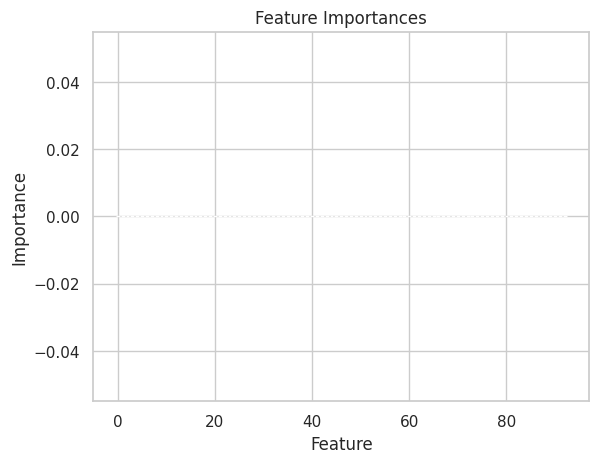

In [114]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_
importances = model.feature_importances_

# Plot the feature importances
features = range(len(importances))
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()
